# Análise Exploratória sobre o ENADE 2017

[Link para download do dados](http://download.inep.gov.br/educacao_superior/indicadores/legislacao/2018/resultados_conceito_enade_2017.csv)

In [73]:
import numpy as np
import pandas as pd


In [74]:
conceito_ie = pd.read_csv('dados/resultados_conceito_enade_2017.csv')

In [76]:
conceito_ie.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 22 columns):
Ano                                 int64
Código da Área                      int64
Área de Avaliação                   object
Código da IES                       int64
Nome da IES                         object
Sigla da IES                        object
Organização Acadêmica               object
Categoria Administrativa            object
Código do Curso                     int64
Modalidade de Ensino                object
Código do Município                 int64
Município do Curso                  object
Sigla da UF                         object
Nº de Concluintes Inscritos         int64
Nº  de Concluintes Participantes    int64
Nota Bruta - FG                     object
Nota Padronizada - FG               object
Nota Bruta - CE                     object
Nota Padronizada - CE               object
Conceito Enade (Contínuo)           object
Conceito Enade (Faixa)              ob

In [77]:
conceito_ie.isnull().sum()

Ano                                     0
Código da Área                          0
Área de Avaliação                       0
Código da IES                           0
Nome da IES                             0
Sigla da IES                          651
Organização Acadêmica                   0
Categoria Administrativa                0
Código do Curso                         0
Modalidade de Ensino                    0
Código do Município                     0
Município do Curso                      0
Sigla da UF                             0
Nº de Concluintes Inscritos             0
Nº  de Concluintes Participantes        0
Nota Bruta - FG                       195
Nota Padronizada - FG                 360
Nota Bruta - CE                       195
Nota Padronizada - CE                 360
Conceito Enade (Contínuo)             360
Conceito Enade (Faixa)                  0
Observação                          10542
dtype: int64

In [93]:
# Carregando o datafram
conceito_ie = pd.read_csv('dados/resultados_conceito_enade_2017.csv',
                          dtype = {
                              u'Conceito Enade (Contínuo)' : 'int64'
                          })

In [94]:
# Criando um novo dataframe a partir das colunas selecionadas
conceitos = conceito_ie[['Código da Área', 
                      'Área de Avaliação',
                      'Nome da IES',
                      'Sigla da IES',
                      'Categoria Administrativa',
                      'Sigla da UF',
                      'Conceito Enade (Contínuo)']]
# Renomeando as colunas
conceitos.columns = ['cod_area', 'area_avaliacao', 'nome_ie', 'sigla_ie', 'categoria_adm', 'sigla_uf', 'conceito']
# Visualizando as primeiras linhas do dataframe resultante

In [95]:
# Filtrando as universidades publicas federais e privadas com fins lucrativos
pubpriv = conceitos[(conceitos['categoria_adm'] == 'Privada') | (conceitos['categoria_adm'] == 'Publica')]
# Visualizando o dataframe

pubpriv.head()


,cod_area,area_avaliacao,nome_ie,sigla_ie,categoria_adm,sigla_uf,conceito
0,21,ARQUITETURA E URBANISMO,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Publica,MT,"4,0873"
1,21,ARQUITETURA E URBANISMO,UNIVERSIDADE DE BRASÍLIA,UNB,Publica,DF,"3,9490"
2,21,ARQUITETURA E URBANISMO,UNIVERSIDADE DE BRASÍLIA,UNB,Publica,DF,"3,3636"
3,21,ARQUITETURA E URBANISMO,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Publica,SE,"3,6794"
4,21,ARQUITETURA E URBANISMO,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Publica,AM,"3,3485"


In [96]:
categoria_adm = pubpriv['categoria_adm'].value_counts()
categoria_adm

Privada    2952
Publica    2876
Name: categoria_adm, dtype: int64

In [97]:
pubpriv['categoria_adm'].value_counts(normalize=True)[0]

0.5065202470830473

In [98]:
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas necessárias para plotar as vizualizações
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Definir o tamanho e a resolução em DPI(Dots Per Inch) das figuras plotadas.
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
# Definir o estilo dos gráficos semelhantes ao ggplot
plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')






In [99]:
categoria_adm = pubpriv['categoria_adm'].value_counts()


(array([0, 1]), <a list of 2 Text xticklabel objects>)

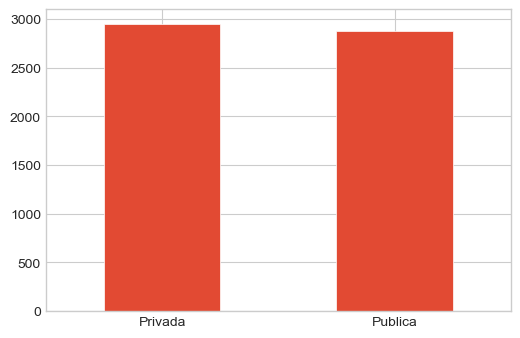

In [100]:
pubpriv.categoria_adm.value_counts().plot.bar()
plt.xticks(rotation=0)

In [101]:
pubpriv.T

,0,1,2,3,4,5,6,7,15,35,...,10545,10546,10549,10551,10553,10556,10557,10559,10560,10567
cod_area,21,21,21,21,21,21,21,21,21,21,...,6409,6409,6409,6409,6409,6409,6409,6409,6409,6409
area_avaliacao,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,ARQUITETURA E URBANISMO,...,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,TECNOLOGIA EM GESTÃO DA TECNOLOGIA DA INFORMAÇÃO
nome_ie,UNIVERSIDADE FEDERAL DE MATO GROSSO,UNIVERSIDADE DE BRASÍLIA,UNIVERSIDADE DE BRASÍLIA,UNIVERSIDADE FEDERAL DE SERGIPE,UNIVERSIDADE FEDERAL DO AMAZONAS,UNIVERSIDADE FEDERAL DO PIAUÍ,UNIVERSIDADE FEDERAL DE OURO PRETO,UNIVERSIDADE FEDERAL DE VIÇOSA,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,UNIVERSIDADE FEDERAL DE SÃO JOÃO DEL REI,...,FACULDADE SÃO BERNARDO DE TECNOLOGIA,INSTITUTO INFNET RIO DE JANEIRO,FACULDADE DE TECNOLOGIA FTEC,Faculdade Estácio de Carapicuíba,FACULDADE DOM PEDRO II DE TECNOLOGIA,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",FACULDADE ANHANGUERA DE ITAPECERICA DA SERRA,CENTRO UNIVERSITÁRIO OPET,FACULDADE ANHANGÜERA DE BAURU,Faculdade Internacional de São Luís
sigla_ie,UFMT,UNB,UNB,UFS,UFAM,UFPI,UFOP,UFV,UFU,UFSJ,...,NaN,INFNET,FTEC Porto Alegre,ESTÁCIO CARAPICUÍBA,FAB,IFTO,NaN,Uniopet,NaN,ISL
categoria_adm,Publica,Publica,Publica,Publica,Publica,Publica,Publica,Publica,Publica,Publica,...,Privada,Privada,Privada,Privada,Privada,Publica,Privada,Privada,Privada,Privada
sigla_uf,MT,DF,DF,SE,AM,PI,MG,MG,MG,MG,...,SP,RJ,RS,SP,BA,TO,SP,PR,SP,MA
conceito,"4,0873","3,9490","3,3636","3,6794","3,3485","4,1383","3,9431","4,4448","4,0584","3,8905",...,"1,6278","2,4015","3,7783","1,1055","2,2251","2,3589","1,6715","2,7286",NaN,"3,8570"


In [102]:
pubpriv.categoria_adm.plot(kind='hist', bins=8, color='orange', edgecolor='black')

TypeError: Empty 'DataFrame': no numeric data to plot

TypeError: unsupported operand type(s) for /: 'str' and 'float'

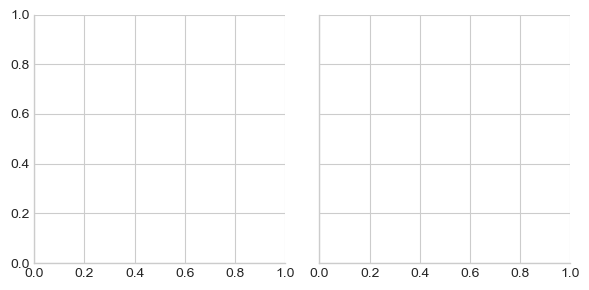

In [103]:
fig = sns.FacetGrid(pubpriv, col='categoria_adm', hue='categoria_adm')
fig.map(sns.distplot, 'conceito', kde=False, hist_kws={'alpha': .8})
fig.add_legend()
plt.show()

In [50]:

#sns.boxplot(x='categoria_adm', y='conceito', data=pubpriv, color='white')
#sns.stripplot(x='categoria_adm', y='conceito', data=pubpriv, s=5, lw=1, color='k', alpha=0.7)
#plt.show()
ax = sns.boxplot(x="categoria_adm", y="conceito", data=pubpriv)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

## EDA

In [28]:
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import missingno as msno
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

ImportError: No module named matplotlib.pyplot

In [29]:
# Convertendo a coluna 'CONCEITO_ENADA' para inteiro
conceito_ccc_nordeste['CONCEITO_ENADE'] = conceito_ccc_nordeste['CONCEITO_ENADE'].astype('int')

NameError: name 'conceito_ccc_nordeste' is not defined

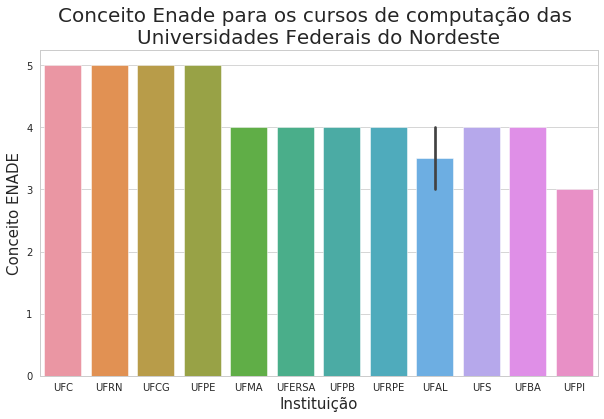

In [25]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(10,6))

# Gerando a figura
ax = sns.barplot('Sigla', 'CONCEITO_ENADE', data=conceito_ccc_nordeste.sort_values(by='CONCEITO_ENADE', ascending=False))

# Título da Figura
ax.set_title('Conceito Enade para os cursos de computação das \nUniversidades Federais do Nordeste', fontsize=20)


# Definindo o nome do eixo horizontal
ax.set_xlabel('Instituição', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_ylabel('Conceito ENADE', fontsize=15)

# Exibindo a figura sem mensagem de retorno
plt.show()